### Upload Event_Category to BQ [ignore if it is already uploadded]

In [1]:
#create a table in BigQuery from a local CSV file.

from google.cloud import bigquery
client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
#Define your schema
schemafield_col1 = bigquery.schema.SchemaField("event_name","STRING")
schemafield_col2 = bigquery.schema.SchemaField("event_category","STRING")



filename = 'aim2_event_category.csv'
table_id = 'aim2_event_category'

dataset_ref = client.dataset('noshad')
table_ref = dataset_ref.table(table_id)

job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.skip_leading_rows = 1
job_config.autodetect = True

with open(filename, "rb") as source_file:
    job = client.load_table_from_file(source_file, table_ref, job_config=job_config)

job.result()  # Waits for table load to complete.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


FileNotFoundError: [Errno 2] No such file or directory: 'aim2_event_category.csv'

### Load data from BQ [OLD/ please run the next cell instead]

In [75]:
# example: read from BigQuery chart to numpy
from google.cloud import bigquery
from google.cloud.bigquery import dbapi;
import numpy as np
import pandas as pd



client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = """
SELECT EV.*, CAT.string_field_1 AS event_category
FROM `som-nero-phi-jonc101.noshad.aim2_event_list_all_v6` AS EV
INNER JOIN `som-nero-phi-jonc101.noshad.aim2_event_category` AS CAT
ON CAT.string_field_0 = EV.event_name
""" # Example dataset table


# to DataFrame

df= (
    client.query(query)
    .result()
    .to_dataframe()
)

print(df.head())
print(df.event_type.unique())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


KeyboardInterrupt: 

In [88]:
# example: read from BigQuery chart to numpy
from google.cloud import bigquery
from google.cloud.bigquery import dbapi;
import numpy as np
import pandas as pd



client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = """
With DESCR AS 
(
SELECT proc_code, description FROM `som-nero-phi-jonc101.starr_datalake2018.order_proc`
GROUP BY proc_code, description
)

SELECT jc_uid,	enc_id,	time_diff,	event_name,  CAT.string_field_1 AS event_category, event_type,	user_type, tpaAdminTime, emergencyAdmitTime
FROM `som-nero-phi-jonc101.noshad.aim2_event_list_all_v6` AS EV
LEFT JOIN `som-nero-phi-jonc101.noshad.aim2_event_category` AS CAT
ON CAT.string_field_0 = EV.event_name
LEFT JOIN DESCR
ON event_name = proc_code
WHERE event_type != "Access log" --AND event_type != "Order Procedure"
--AND event_type LIKE '%ADT%'
GROUP BY jc_uid,	enc_id,	time_diff,	event_name, event_category, event_type,	user_type, tpaAdminTime, emergencyAdmitTime
ORDER BY enc_id, time_diff
""" # Example dataset table


# to DataFrame

df= (
    client.query(query)
    .result()
    .to_dataframe()
)

print(df.head())
print(df.event_type.unique())

priority_df = pd.DataFrame({'event_type':['Admission','Order Procedure', 'Order Medication', 'Initiate Procedure', 'Lab Result',
 'Radiology Report', 'Medication Given'], 'event_priority':[0,1,2,3,4,5,6]})
print(df.event_type.describe)
df = df.merge(priority_df, how = 'inner', on='event_type')
df = df.sort_values(by=['enc_id','time_diff','event_priority'])
print(df.columns)
#df.head(20).to_csv('sample_event_log.csv')
df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


     jc_uid        enc_id  time_diff                    event_name  \
0  JCdb0e75  131009784135       -975  ECG PROCEDURE SCANNED REPORT   
1  JCdb0e75  131009784135         -5               SPECIMEN REMARK   
2  JCdb0e75  131009784135         -5               TYPE AND SCREEN   
3  JCdb0e75  131009784135         -5                    HEMATOCRIT   
4  JCdb0e75  131009784135         -5                PLATELET COUNT   

  event_category       event_type           user_type        tpaAdminTime  \
0           None  Order Procedure                None 2011-01-15 17:02:00   
1           None   Lab Collection  Emergency Resident 2011-01-15 17:02:00   
2           None   Lab Collection  Emergency Resident 2011-01-15 17:02:00   
3           None   Lab Collection  Emergency Resident 2011-01-15 17:02:00   
4           None   Lab Collection  Emergency Resident 2011-01-15 17:02:00   

   emergencyAdmitTime  
0 2011-01-15 16:15:00  
1 2011-01-15 16:15:00  
2 2011-01-15 16:15:00  
3 2011-01-15 16:15:0

,jc_uid,enc_id,time_diff,event_name,event_category,event_type,user_type,tpaAdminTime,emergencyAdmitTime,event_priority
0,JCdb0e75,131009784135,-975,ECG PROCEDURE SCANNED REPORT,None,Order Procedure,None,2011-01-15 17:02:00,2011-01-15 16:15:00,1
1,JCdb0e75,131009784135,1,CT HEAD,CT Head,Order Procedure,Emergency Resident,2011-01-15 17:02:00,2011-01-15 16:15:00,1
2,JCdb0e75,131009784135,5,GLUCOSE BY METER,None,Order Procedure,None,2011-01-15 17:02:00,2011-01-15 16:15:00,1
9453,JCdb0e75,131009784135,5,GLUCOSE BY METER,None,Initiate Procedure,None,2011-01-15 17:02:00,2011-01-15 16:15:00,3
18508,JCdb0e75,131009784135,6,GLUCOSE BY METER,None,Lab Result,None,2011-01-15 17:02:00,2011-01-15 16:15:00,4
...,...,...,...,...,...,...,...,...,...,...
18504,JCd4a011,131229540038,37,PATIENT ON ACTIVE PROTOCOL,PATIENT ON ACTIVE PROTOCOL,Initiate Procedure,PHYSICIAN,2017-04-18 16:19:00,2017-04-18 15:38:00,3
18505,JCd4a011,131229540038,37,VITAL SIGNS DURING INFUSION,None,Initiate Procedure,PHYSICIAN,2017-04-18 16:19:00,2017-04-18 15:38:00,3
18506,JCd4a011,131229540038,37,NEUROLOGICAL CHECKS,None,Initiate Procedure,PHYSICIAN,2017-04-18 16:19:00,2017-04-18 15:38:00,3
18507,JCd4a011,131229540038,37,NURSING PULSE OXIMETRY,None,Initiate Procedure,PHYSICIAN,2017-04-18 16:19:00,2017-04-18 15:38:00,3


### Correct time_diff of order procedures


In [89]:
df.loc[df['event_type']=='Order Procedure','time_diff'] = df.loc[df['event_type']=='Order Procedure','time_diff']-1

### Filter the cohort based on t2tPA

In [90]:
from datetime import datetime, timedelta

df['t2tpa']=(df['tpaAdminTime']-df['emergencyAdmitTime']).dt.total_seconds().div(60).astype(int)
#df=df[df.t2tpa>45]
print(df.t2tpa.iloc[100:120])

48       61
49       61
50       61
51       61
21346    61
18515    61
18516    61
9491     61
9492     61
9493     61
9494     61
9495     61
9496     61
9497     61
9498     61
9499     61
9500     61
9501     61
9502     61
9503     61
Name: t2tpa, dtype: int64


### Pre-processing: Filtering out Specific Events

In [91]:
# filter the events in terms of event_type
print(len(df))
F = ['Order Medication', 'Admission', 'Order Procedure',#'Access log', # 'Lab Collection', #'Access log',
 'Lab Result',  'Radiology Proc Started', #'Procedure Start',
 'Medication Given', 'Radiology Report']

df_filter = pd.DataFrame({'event_type':F})
df_f = df.merge(df_filter, how = 'inner', on='event_type')
print(len(df))


## Filter by the frequency of the events
print(df_f.groupby('enc_id').size())
df_freq = df_f.groupby(['event_name','event_type']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
print(df_freq.head(20))

df_low_count = df_freq[df_freq.counts<300]

df_f = df_f.merge(df_low_count, how = 'inner', on=['event_name','event_type'])

### Filter out Other specific events
#df_f = df_f[df_f.event_name!='NOTIFY MD:']




22081
22081
enc_id
131009784135    29
131011501539    46
131011574201    62
131012179111    64
131012404716    62
                ..
131223517964    43
131224318222    53
131225347064    52
131226142346    53
131229540038    49
Length: 264, dtype: int64
                                            event_name        event_type  \
320                             NURSING PULSE OXIMETRY   Order Procedure   
309                                         NOTIFY MD:   Order Procedure   
300                                NEUROLOGICAL CHECKS   Order Procedure   
463                        VITAL SIGNS DURING INFUSION   Order Procedure   
462                                        VITAL SIGNS   Order Procedure   
119                       CT HEAD PERFUSION W CONTRAST   Order Procedure   
276                     METABOLIC PANEL, COMPREHENSIVE   Order Procedure   
379                                   PROTHROMBIN TIME   Order Procedure   
155                                        ECG 12-LEAD   Order

### Node Label Creation

In [92]:
# The list of columns for creating node names
L = ['event_type', 'event_name']


ABB = {'Order Procedure': 'OP', 'Lab Result':'LR', '2001002':'ER', 'ADT-':'', 'Started': 'Done', 'ALTEPLASE 100': 'ALTEPLASE (tPA) 100', 'OXYGEN:': 'OXYGEN'}

Apply_ABB = True # Apply abbreviation

# Create The column node_name
df_f['node_name'] = df_f[L[0]]







for i in range(1,len(L)):
    df_f['node_name'] = df_f['node_name'] +' - ' +df_f[L[i]]   
    

    # Node name edits and abbrevations
if Apply_ABB==True:
    for x in ABB.keys():
        df_f['node_name']=df_f['node_name'].replace(ABB, regex=True)#replace(x,ABB[x])







print(df_f['node_name'].head())
print(len(df_f['node_name'].unique()))



#df['node_name'] = df['event_type']+' - '+df['event_category']
#print(df['node_name'].head())

0    OP - ECG PROCEDURE SCANNED REPORT
1    OP - ECG PROCEDURE SCANNED REPORT
2    OP - ECG PROCEDURE SCANNED REPORT
3    OP - ECG PROCEDURE SCANNED REPORT
4    OP - ECG PROCEDURE SCANNED REPORT
Name: node_name, dtype: object
478


### choose top k most frequent event types

In [93]:
k= 15

df_enc_event = df_f[['enc_id', 'node_name', 'time_diff']]
#print(df_enc_event.head())


# drop duplicate node_names (might be of different time_diff)
df_enc_event = df_enc_event.drop_duplicates(subset=['enc_id','node_name'])


# find the sorted event types
#df_sorted = df_f.groupby('node_name').apply(len).reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)  
#df_f.groupby('node_name').agg({lambda x: len(x['node_name']),
#             lambda x: x['time_diff'].mean()})#.sort_values('count',ascending=False)  

def my_f(x):
    d = []
    d.append(len(x['node_name']))
    d.append(x['time_diff'].median())
    return pd.Series(d) #, index=[['count', 'time_avg']])

#print(df_f.head())

#df_sorted = df_f.groupby('node_name').apply(my_f).reset_index().rename(columns={0:'count', 1:'time_avg'}).sort_values('count',ascending=False) #.sort_values('count',ascending=False)  

df_sorted = df_enc_event.groupby('node_name').apply(my_f).reset_index().rename(columns={0:'count', 1:'time_avg'}).sort_values('count',ascending=False).reset_index(drop=True) #.sort_values('count',ascending=False)  
df_sorted = df_sorted.drop_duplicates(subset=['node_name'])


#print(df_sorted.head())

# pick the top k events
df_sorted_long = df_sorted
df_sorted = df_sorted.head(k)



# Also add the pairs
print(df_sorted)
for i in range(len(df_sorted)):
    print(i)
        
    print(df_sorted.loc[i,'node_name'])
    if df_sorted.loc[i,'node_name'][:2] == 'OP':
        print("df_dorted.loc[i,'node_name']",df_sorted.loc[i,'node_name'])
        rest = df_sorted.loc[i,'node_name'][2:]
        print('LR'+rest)
        id = (df_sorted_long['node_name']=='LR'+rest)
        if len(df_sorted_long[id])>0 and len(df_sorted[df_sorted['node_name']=='LR'+rest])==0:
            print('exist')
            df_sorted = pd.concat([df_sorted, df_sorted_long[id]])




print(df_sorted)


# filter the events
#tt = df_enc_event.merge(df_sorted, how='inner', on='event_type')
#print(tt.head())

df_enc_event = df_enc_event.merge(df_sorted, how='inner', on='node_name')[['enc_id', 'node_name','time_diff','time_avg']].sort_values(['enc_id','time_diff'],ascending=True)
#df_enc_event = df_enc_event_merge

print(df_enc_event.iloc[400:460])

                                            node_name  count  time_avg
0   Medication Given - ALTEPLASE (tPA) 100 MG IV SOLR  259.0      49.0
1                 OP - METABOLIC PANEL, COMPREHENSIVE  255.0       1.0
2   Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR  254.0      33.0
3                               OP - PROTHROMBIN TIME  249.0       1.0
4                   OP - CT HEAD PERFUSION W CONTRAST  246.0       2.0
5                                    OP - ECG 12-LEAD  239.0       1.0
6                     OP - PATIENT ON ACTIVE PROTOCOL  235.0      32.0
7                          OP - SALINE LOCK AND FLUSH  216.0       1.0
8                                OP - CARDIAC MONITOR  215.0       1.0
9                            Admission - Registration  210.0      -3.0
10                           OP - SWALLOW ASSESSSMENT  208.0       1.0
11            OP - OXYGEN NASAL CANNULA(NURSING ONLY)  206.0       1.0
12                         OP - ISTAT INR AND PROTIME  205.0      14.0
13    

### Discover specific pairs

In [94]:
for i in range (len(df_enc_event)-1):
    r = df_enc_event.iloc[i]
    t = df_enc_event.iloc[i+1]
    if r['node_name']== 'Lab Result - Troponin': #'Lab Result - EKG5':
        print(r['node_name'],' , ', r['time_avg'],' , ',t['node_name'], t['time_avg'])
        print('*********')
        

### Create the table of unique encounter id

In [95]:

unq_PC_enc_event = df_enc_event.groupby(['enc_id'])['node_name'].apply(list).reset_index().rename(columns={'enc_id':'enc_id', 0:'event_list'}).sort_values('enc_id',ascending=True)  
unq_PC_enc_time = df_enc_event.groupby(['enc_id'])['time_diff'].apply(list).reset_index().rename(columns={'enc_id':'enc_id', 0:'time_diff'}).sort_values('enc_id',ascending=True)  

unq_PC_enc = unq_PC_enc_event.merge(unq_PC_enc_time, how='left',on='enc_id')


print(len(unq_PC_enc))
print(unq_PC_enc.head(30))

superlist = unq_PC_enc['node_name'].tolist()
superlist_time = unq_PC_enc['time_diff'].tolist()
i = 10
print(superlist[i])

unq_PC_enc.to_csv('all_workflows.csv')
#unq_PC_enc['event_type'].to_csv('test_csv')

264
          enc_id                                          node_name  \
0   131009784135  [OP - CT HEAD, OP - ISTAT INR AND PROTIME, LR ...   
1   131011501539  [Admission - Registration, OP - CT HEAD, OP - ...   
2   131011574201  [OP - CT HEAD, OP - ECG 12-LEAD, OP - PROTHROM...   
3   131012179111  [Admission - Registration, OP - CT HEAD, OP - ...   
4   131012404716  [Admission - Registration, OP - CT HEAD, OP - ...   
5   131012428441  [Admission - Registration, OP - ECG 12-LEAD, O...   
6   131012582561  [Admission - Registration, OP - CT HEAD, OP - ...   
7   131012620203  [Admission - Registration, OP - CT HEAD, OP - ...   
8   131012635841  [OP - CT HEAD, Admission - Registration, OP - ...   
9   131012747130  [Admission - Registration, OP - CT HEAD, OP - ...   
10  131012861842  [Admission - Registration, OP - CT HEAD, LR - ...   
11  131012891143  [OP - CT HEAD PERFUSION W CONTRAST, LR - ECG 1...   
12  131012919637  [Admission - Registration, OP - CT HEAD, LR - ...   
13

### Get consecutive pairs

In [96]:
import pandas as pd

A = {}
A['node1']=[]
A['node2']=[]
A['time_weight']=[]
A['node1_time']=[]
A['node2_time']=[]

df_g = pd.DataFrame(A)

for i in range(len(superlist)):
    t = 0
    for x, y in zip(superlist[i], superlist[i][1:]):
        t+=1
        td = superlist_time[i][t]-superlist_time[i][t-1]
        #print(x,y)
        df_temp = pd.DataFrame({'node1':[x],'node2':[y],'time_weight':[td], 'node1_time':[df_sorted[df_sorted.node_name==x].time_avg.iloc[0]], 'node2_time':[df_sorted[df_sorted.node_name==y].time_avg.iloc[0]]})
        df_g = pd.concat([df_g, df_temp])
        
print(df_g.head())
print(len(df_g))

                               node1                              node2  \
0                       OP - CT HEAD         OP - ISTAT INR AND PROTIME   
0         OP - ISTAT INR AND PROTIME         LR - ISTAT INR AND PROTIME   
0         LR - ISTAT INR AND PROTIME                   LR - ECG 12-LEAD   
0                   LR - ECG 12-LEAD  OP - CT HEAD PERFUSION W CONTRAST   
0  OP - CT HEAD PERFUSION W CONTRAST              OP - PROTHROMBIN TIME   

   time_weight  node1_time  node2_time  
0          6.0         1.0        14.0  
0          2.0        14.0        16.0  
0          1.0        16.0        14.0  
0         22.0        14.0         2.0  
0         10.0         2.0         1.0  
3553


### save the weighted edges

In [97]:
import pandas as pd

E = {} # frequency of the edges
T = {} # CUMULATIVE Lag between nodes
Node1_Time={}
Node2_Time={}

for i in range(len(superlist)):
    t=0
    for x, y in zip(superlist[i], superlist[i][1:]):
        t+=1
        td = superlist_time[i][t]-superlist_time[i][t-1]
        #t2 = superlist_time[i][t]
        #t1 = superlist_time[i][t-1]
        t1 = df_sorted[df_sorted.node_name==x].time_avg.iloc[0]
        t2 = df_sorted[df_sorted.node_name==y].time_avg.iloc[0]
        
        
        #print(x,y)
        if (x,y) not in E.keys():
            E[(x,y)]=1
            T[(x,y)]=td # the relative time between nodes
            Node1_Time[(x,y)]= t1 # Average time of the node
            Node2_Time[(x,y)]= t2 # Average time of the node
        else:
            E[(x,y)]+=1
            T[(x,y)]+=td  # the CUMULATIVE relative time between nodes
            #Node1_Time[(x,y)]+= t1
            #Node2_Time[(x,y)]+= t2
            
print(len(E.keys()))                
#print(df.head())
#print(len(df))

176


In [98]:
print(E)

{('OP - CT HEAD', 'OP - ISTAT INR AND PROTIME'): 11, ('OP - ISTAT INR AND PROTIME', 'LR - ISTAT INR AND PROTIME'): 178, ('LR - ISTAT INR AND PROTIME', 'LR - ECG 12-LEAD'): 17, ('LR - ECG 12-LEAD', 'OP - CT HEAD PERFUSION W CONTRAST'): 14, ('OP - CT HEAD PERFUSION W CONTRAST', 'OP - PROTHROMBIN TIME'): 173, ('OP - PROTHROMBIN TIME', 'OP - PATIENT ON ACTIVE PROTOCOL'): 4, ('OP - PATIENT ON ACTIVE PROTOCOL', 'OP - ECG 12-LEAD'): 3, ('OP - ECG 12-LEAD', 'Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR'): 2, ('Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR', 'Medication Given - ALTEPLASE (tPA) 100 MG IV SOLR'): 110, ('Admission - Registration', 'OP - CT HEAD'): 103, ('OP - CT HEAD', 'OP - PROTHROMBIN TIME'): 42, ('OP - PROTHROMBIN TIME', 'OP - SALINE LOCK AND FLUSH'): 51, ('OP - SALINE LOCK AND FLUSH', 'OP - METABOLIC PANEL, COMPREHENSIVE'): 205, ('OP - METABOLIC PANEL, COMPREHENSIVE', 'OP - PATIENT ON ACTIVE PROTOCOL'): 7, ('OP - PATIENT ON ACTIVE PROTOCOL', 'Order Medication - ALTEPL

### Filter edges and save to a list of edges with different weight types

In [99]:
alpha = 20 #lower boud for edge frequency weight to show in the final graph

up_threshold = 25 #ignore edges with relative time more than up_threshold 

A = []
E_max = 0 # maximum frequency of the edges
for e in E.keys():
    if E[e]>alpha and e[0]!=e[1]:
        
        t1 = Node1_Time[e]#/E[e]
        t2 = Node2_Time[e]#/E[e]
        rtw= T[e]/E[e] # average relative time of all this type edges (CUMULATIVE/NUMBER of EDGES)
        tw = t2-t1 
        #w = T[e]/E[e] # average relative time of all this type edges
        
        e_type = (e[0],e[1],tw, E[e], t1,t2, rtw)
        
        if tw<up_threshold: # and t1<=t2: # remove the back edges
            A.append(e_type)
            
            # find maximum freq of edges in order to normalize the freq
            if E[e]>E_max:
                E_max = E[e]
print(A[:10])
print(len(A))

[('OP - ISTAT INR AND PROTIME', 'LR - ISTAT INR AND PROTIME', 2.0, 178, 14.0, 16.0, 1.4101123595505618), ('OP - CT HEAD PERFUSION W CONTRAST', 'OP - PROTHROMBIN TIME', -1.0, 173, 2.0, 1.0, 0.2138728323699422), ('Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR', 'Medication Given - ALTEPLASE (tPA) 100 MG IV SOLR', 16.0, 110, 33.0, 49.0, 13.10909090909091), ('Admission - Registration', 'OP - CT HEAD', 4.0, 103, -3.0, 1.0, 9.844660194174757), ('OP - CT HEAD', 'OP - PROTHROMBIN TIME', 0.0, 42, 1.0, 1.0, 1.3571428571428572), ('OP - PROTHROMBIN TIME', 'OP - SALINE LOCK AND FLUSH', 0.0, 51, 1.0, 1.0, 0.0), ('OP - SALINE LOCK AND FLUSH', 'OP - METABOLIC PANEL, COMPREHENSIVE', 0.0, 205, 1.0, 1.0, 0.0), ('OP - PATIENT ON ACTIVE PROTOCOL', 'Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR', 1.0, 197, 32.0, 33.0, 1.0812182741116751), ('OP - OXYGEN NASAL CANNULA(NURSING ONLY)', 'OP - SWALLOW ASSESSSMENT', 0.0, 194, 1.0, 1.0, 0.0), ('OP - SWALLOW ASSESSSMENT', 'OP - CARDIAC MONITOR', 0.0, 198, 1.

### Find Adjacency matrix

In [100]:
#############################
# assign index for the vertices 

I={} # index dict
i = 0
for e in A:
    if e[0] not in I.keys():
        I[e[0]]=i
        i+=1
        
    if e[1] not in I.keys():
        I[e[1]]=i
        i+=1

#######################
# create adjacency matrix
#print(i)
I_inv =  {value : key for (key, value) in I.items()}

print(I_inv) # contains node names
Adj = np.zeros((i,i))
Adj_lag = np.zeros((i,i))
for e in A:
    Adj[I[e[0]],I[e[1]]]=e[3]
    Adj_lag[I[e[0]],I[e[1]]]=e[6]
    #Adj[I[e[1]],I[e[0]]]=1

print(Adj)
print(Adj_lag)
I_org = I

{0: 'OP - ISTAT INR AND PROTIME', 1: 'LR - ISTAT INR AND PROTIME', 2: 'OP - CT HEAD PERFUSION W CONTRAST', 3: 'OP - PROTHROMBIN TIME', 4: 'Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR', 5: 'Medication Given - ALTEPLASE (tPA) 100 MG IV SOLR', 6: 'Admission - Registration', 7: 'OP - CT HEAD', 8: 'OP - SALINE LOCK AND FLUSH', 9: 'OP - METABOLIC PANEL, COMPREHENSIVE', 10: 'OP - PATIENT ON ACTIVE PROTOCOL', 11: 'OP - OXYGEN NASAL CANNULA(NURSING ONLY)', 12: 'OP - SWALLOW ASSESSSMENT', 13: 'OP - CARDIAC MONITOR', 14: 'LR - PROTHROMBIN TIME', 15: 'LR - METABOLIC PANEL, COMPREHENSIVE', 16: 'OP - ECG 12-LEAD', 17: 'LR - ECG 12-LEAD'}
[[  0. 178.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  71.   0.   0.   0.
   50.   0.   0.   0.]
 [  0.   0.   0. 173.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  51.   0.   0.   0.   0.   0.
    0

### Normalize the weights to be probability

In [101]:
print(np.sum(Adj,axis=1))
for i in range(Adj.shape[0]):
    if np.sum(Adj[i])>0:
        Adj[i] = Adj[i]/np.sum(Adj[i])
print(Adj)

[178. 121. 173. 215. 209.   0. 184. 144. 205. 195. 197. 194. 198.  94.
 116.  71. 189.  46.]
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.58677686 0.
  0.         0.         0.41322314 0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.2372093  0.         0.         0.
  0.         0.         0.         0.         0.7627907  0.        ]
 [0.11004785 0.         0.         0.         0.         0.52631579
  0.         0.         0.         0.         0.         0.
  0.         0.        

### Plot simple graph

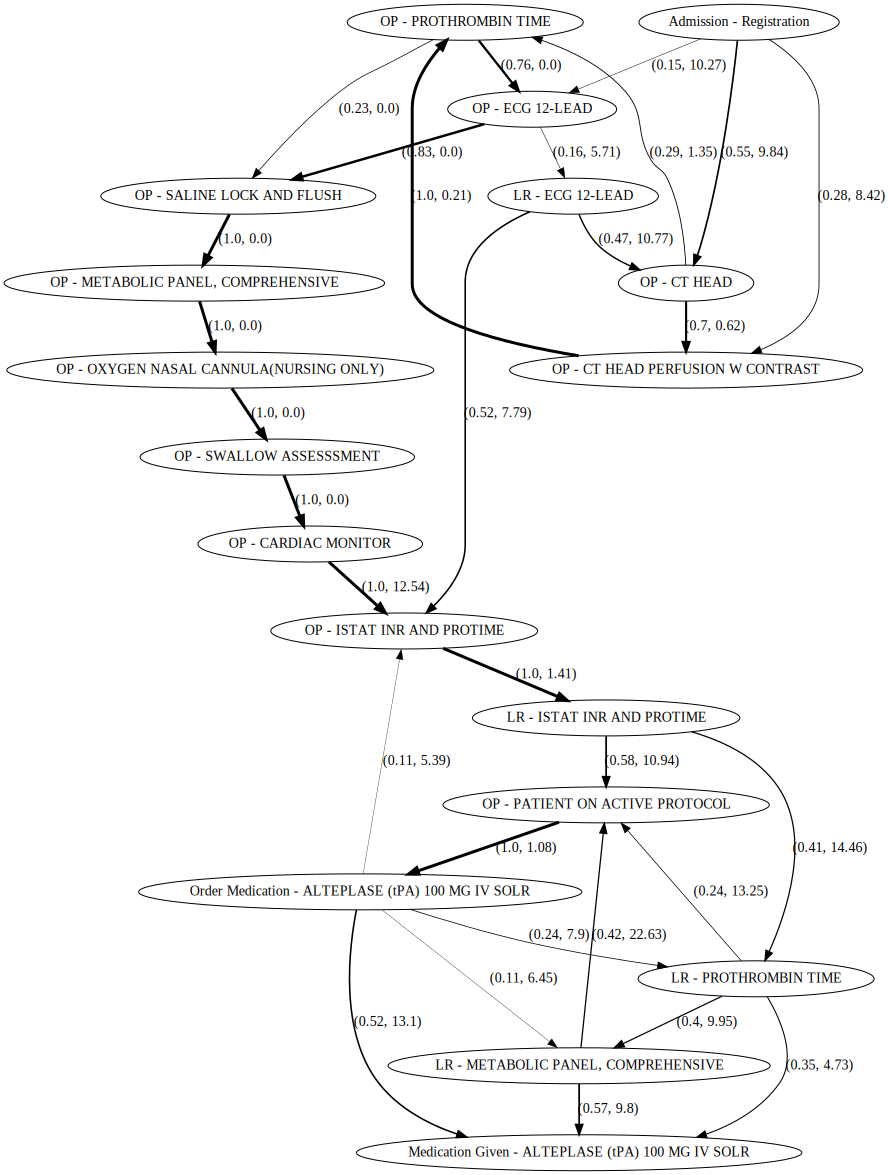

'more_desc.gv.pdf'

In [102]:
from IPython.display import display

import graphviz

dot = graphviz.Digraph()

for e in A:
    
    prob=Adj[I[e[0]],I[e[1]]] # find the probability weight from the adjacency matrix
    lag=Adj_lag[I[e[0]],I[e[1]]] # find the probability weight from the adjacency matrix
    label='('+str(int(prob*100)/100)+', '+str(int(lag*100)/100)+')'
    dot.edge(e[0],e[1], label=label , penwidth=str(3*prob))#, penwidth=1)
    #dot.edge.attr['penwidth'] = 1
    
engin = sorted(graphviz.ENGINES)[0]
display(dot)
dot.render('more_desc.gv', view=True) 

### Plot time ordered Graph

In [75]:
import networkx as nx
import pygraphviz as pgv # pygraphviz should be available

path = 'MCP2' # Minimum time path 'MCP1' (Most common Path)  'MCP2'
path_edges = []
plot_specific_paths  = False

G = nx.DiGraph()

for e in A:
    print(e)
    #pw = str(5*e[3]/E_max)
    pw = "0.5"
    
    #colored_edge = False 
    
    prob=Adj[I[e[0]],I[e[1]]] # find the probability weight from the adjacency matrix
    lag=Adj_lag[I[e[0]],I[e[1]]] # find the probability weight from the adjacency matrix
    label='('+str(int(prob*100)/100)+', '+str(int(lag*100)/100)+')'
    
    #dot.edge(e[0],e[1], label=label , penwidth=str(3*prob))#, penwidth=1)
    
    G.add_edge(e[0],e[1], label=label , penwidth=str(3*prob))#, penwidth=1)
    
    #if (e[0],e[1]) in path1_edges and (e[0],e[1]) in path2_edges:
    #    G.add_edge(e[0],e[1], label=pl, penwidth=pw, color="purple")
        
    #if (e[0],e[1]) in path1_edges:
    #    colored_edge = True
    #    G.add_edge(e[0],e[1], label=pl, penwidth=pw, color="blue")#, penwidth=1)
    
    #if (e[0],e[1]) in path2_edges:
    #    colored_edge = True
    #    G.add_edge(e[0],e[1], label=pl, penwidth=pw, color="red")
    #else:
    #    G.add_edge(e[0],e[1], label=pl, penwidth=pw)
    #if colored_edge == False:
    #    G.add_edge(e[0],e[1], label=pl, penwidth=pw)

if plot_specific_paths:
    
    if path == 'MTP':
        path_edges = path1_edges
    elif path == 'MCP1':
        path_edges = path2_edges
    elif path == 'MCP2':
        path_edges = path_med_edges

    G.add_node(path_edges[0][0],color="green", style='filled')

    for e in path_edges:
        G.add_edge(e[0],e[1], penwidth="3", color="green")
    

# copy to a new graph in order to assign levels
new_G = nx.nx_agraph.to_agraph(G)

Time_node = '-20'

L2=[]
for i in np.arange(-20,80,1):
    
    L = df_sorted[df_sorted.time_avg.astype(int)==i].node_name.tolist()
    #L2 = df_sorted[df_sorted.time_avg.astype(int)==i+1].node_name.tolist()
    L = L+L2
    if len(L)==0:
        continue


    # join a side graph
    if Time_node != '-20':
        new_G.add_edge(Time_node,str(i))
        #print(Time_node)
    Time_node = str(i)
    L.append(Time_node)

    

    #if Time_node=='0':
    #    new_G.add_subgraph(L,rank='min')
    #    print(i,L,len(L),'source')
    #else:
    new_G.add_subgraph(L,rank='same')
    print(i,L,len(L),'same')
    #print(L,'same level')

    
    #print()

# add color
#new_G.edges.data('color', default='red')


#one = A.add_subgraph(['a','b','c'],rank='same')
#two = A.add_subgraph(['aa','ab','bb'],rank='same')
#three = A.add_subgraph(['bba','bbc'],rank='same')

#pos = nx.spring_layout(new_G)
#nx.draw(new_G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

display(new_G)
new_G.draw('example.png', prog='dot')

# neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.
#import matplotlib.pyplot as plt

#pos={'0':(1,0),'1':(1,1),'2':(1,2),'3':(1,3)} #node:(x,y)
#nx.draw(new_G,pos=pos)
#plt.show()


('OP - ISTAT INR AND PROTIME', 'LR - ISTAT INR AND PROTIME', 2.0, 178, 14.0, 16.0, 1.4101123595505618)
('OP - CT HEAD PERFUSION W CONTRAST', 'OP - PROTHROMBIN TIME', -1.0, 173, 2.0, 1.0, 0.2138728323699422)
('Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR', 'Medication Given - ALTEPLASE (tPA) 100 MG IV SOLR', 16.0, 110, 33.0, 49.0, 13.10909090909091)
('Admission - Registration', 'OP - CT HEAD', 4.0, 103, -3.0, 1.0, 9.844660194174757)
('OP - CT HEAD', 'OP - PROTHROMBIN TIME', 0.0, 42, 1.0, 1.0, 1.3571428571428572)
('OP - PROTHROMBIN TIME', 'OP - SALINE LOCK AND FLUSH', 0.0, 51, 1.0, 1.0, 0.0)
('OP - SALINE LOCK AND FLUSH', 'OP - METABOLIC PANEL, COMPREHENSIVE', 0.0, 205, 1.0, 1.0, 0.0)
('OP - PATIENT ON ACTIVE PROTOCOL', 'Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR', 1.0, 197, 32.0, 33.0, 1.0812182741116751)
('OP - OXYGEN NASAL CANNULA(NURSING ONLY)', 'OP - SWALLOW ASSESSSMENT', 0.0, 194, 1.0, 1.0, 0.0)
('OP - SWALLOW ASSESSSMENT', 'OP - CARDIAC MONITOR', 0.0, 198, 1.0, 1.0, 0.

<AGraph <Swig Object of type 'Agraph_t *' at 0x12000bf30>>

### Find the median path

In [48]:
# for all of the patients
import math
Score = np.zeros(len(unq_PC_enc))

for i in range(len(unq_PC_enc)):
    L = unq_PC_enc.node_name.iloc[i]
    #print(L)
    
    for j in range(len(L)-1):

        Score[i] +=  - math.log(E[(L[j],L[j+1])]/E_max)
    
    Score[i] = Score[i]#/len(L)

print(Score)
#Score = -Score
med = np.argmin(Score)

print(np.argmin(Score), Score[med])

path_med_edges = [(unq_PC_enc.node_name.iloc[med][t],unq_PC_enc.node_name.iloc[med][t+1]) for t in range(len(unq_PC_enc.node_name.iloc[med])-1)]
print(path_med_edges)

[21.82331452 19.29048888 29.268546   15.37782386 17.31129397 38.60262535
 25.30693045 19.43106543 29.16472969 40.44564013 13.6875222  17.62098853
 20.58433796 20.19328328 33.22536799 21.55184708 28.01170806 20.35200638
 21.66429257 15.46250489 26.29475807 18.93977664 17.43575641 18.33905228
 25.87544117  7.2263543  19.80358171 11.7905672  22.32110075  8.61158007
  7.53932618 21.30966622 30.0536218  12.99981962 23.26264369 12.66047729
 21.91329733 22.69784968 24.25776148 17.35189018 26.39338308 28.3113529
 27.9819605  19.17741918 18.66095295 32.22599866 25.88589114 14.11679743
 31.59521927 33.63544183 32.13814862 28.4180256  15.1102009  15.69570253
 24.48174489 24.79807377 18.0676749  10.65877901 19.14119718 16.17756172
 13.41238202 19.75552524 20.42551027 27.50636661 13.42731218  8.11892687
 33.06503054 20.73449862 21.30966622 26.87868408 18.60392063 39.16257949
 17.8551836  15.4956069  14.91894537 27.30755292 33.73798222 30.85560507
 16.2031193   7.18813161 14.83274028 10.98480653 21.

# Sort patients according to the MCP scores

In [49]:
Score_c = Score

for i in range(5):
    med = np.argmax(Score_c)
    print(np.argmin(Score), Score[med])
    path_med_edges = [(unq_PC_enc.node_name.iloc[med][t],unq_PC_enc.node_name.iloc[med][t+1]) for t in range(len(unq_PC_enc.node_name.iloc[med])-1)]
    print(path_med_edges)
    Score_c[med]=0

240 40.44564012910772
[('Admission - Registration', 'OP - CT HEAD'), ('OP - CT HEAD', 'OP - METABOLIC PANEL, COMPREHENSIVE'), ('OP - METABOLIC PANEL, COMPREHENSIVE', 'OP - ECG 12-LEAD'), ('OP - ECG 12-LEAD', 'OP - ISTAT INR AND PROTIME'), ('OP - ISTAT INR AND PROTIME', 'OP - PROTHROMBIN TIME'), ('OP - PROTHROMBIN TIME', 'OP - CARDIAC MONITOR'), ('OP - CARDIAC MONITOR', 'LR - ISTAT INR AND PROTIME'), ('LR - ISTAT INR AND PROTIME', 'OP - CT HEAD PERFUSION W CONTRAST'), ('OP - CT HEAD PERFUSION W CONTRAST', 'OP - PATIENT ON ACTIVE PROTOCOL'), ('OP - PATIENT ON ACTIVE PROTOCOL', 'Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR'), ('Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR', 'LR - PROTHROMBIN TIME'), ('LR - PROTHROMBIN TIME', 'LR - METABOLIC PANEL, COMPREHENSIVE'), ('LR - METABOLIC PANEL, COMPREHENSIVE', 'LR - ECG 12-LEAD'), ('LR - ECG 12-LEAD', 'Medication Given - ALTEPLASE (tPA) 100 MG IV SOLR')]
9 39.162579494187874
[('Admission - Registration', 'OP - ECG 12-LEAD'), ('OP - ECG

### Run Dijkstra Algorithm and Find Shortest Path

In [50]:

########################
### Shortest path based on frequency weight
#from scipy.sparse.csgraph import dijkstra
#dijkstra(csgraph, directed=True) #, indices=None, return_predecessors=False, unweighted=False
from dijkstar import Graph, find_path
import math

i_start = I['ADT - Admission']
i_mid = I['OP - CT Head']
i_end = I['Medication Given - tPA']


graph = Graph()
for e in A:
    #print(I[e[0]], I[e[1]], e[3])
    graph.add_edge(I[e[0]], I[e[1]], -e[3])
    #Adj[I[e[0]],I[e[1]]]=e[3]
#print(graph)
Q = find_path(graph, i_start, i_mid)[0] # admission to CT Order
print(Q)
R = find_path(graph, i_mid, i_end)[0][1:]
Q = Q+R # admission to CT Order
print(Q)
path1_edges_idx = [(Q[i],Q[i+1]) for i in range(len(Q)-1)]
path1_edges = [(I_inv[Q[i]],I_inv[Q[i+1]]) for i in range(len(Q)-1)]
print(path1_edges_idx)
print(path1_edges)

### shortest path based on relative time 


graph = Graph()
for e in A:
    #print(I[e[0]], I[e[1]], e[3])
    if e[6]>0:
        graph.add_edge(I[e[0]], I[e[1]], - math.log(e[6]/E_max))
    #Adj[I[e[0]],I[e[1]]]=e[3]
#print(graph)
Q = find_path(graph, i_start, i_mid)[0] # admission to CT Order
Q = Q + find_path(graph, i_mid, i_end)[0][1:] # admission to CT Order
path2_edges_idx = [(Q[i],Q[i+1]) for i in range(len(Q)-1)]
path2_edges = [(I_inv[Q[i]],I_inv[Q[i+1]]) for i in range(len(Q)-1)]
print(path2_edges_idx)
print(path2_edges)

KeyError: 'ADT - Admission'

In [51]:
### Assign Score for each Encounter


A = []
E_max = 0 # maximum frequency of the edges
for e in E.keys():
    if E[e]>alpha and e[0]!=e[1]:
        
        t1 = Node1_Time[e]#/E[e]
        t2 = Node2_Time[e]#/E[e]
        
        tw = t2-t1
        rtw= T[e]/E[e] # average relative time of all this type edges
        #w = T[e]/E[e] # average relative time of all this type edges
        
        e_type = (e[0],e[1],tw, E[e], t1,t2, rtw)
        if w<up_threshold and t1<t2:
            A.append(e_type)
            
            # find maximum freq of edges in order to normalize the freq
            if E[e]>E_max:
                E_max = E[e]
print(A[:10])
print(len(A))

NameError: name 'w' is not defined

### Apply graph shrinking

In [76]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components


#############################
# Create A_eta: threshold graph
eta = 0.001 # threshold for finding connected graphs

# find edges with less than threshold and the same type

#print(A[0])
#e = A[0]
#print(e[0].split("-")[0])
#print(e[0].split("-")[0]==e[1].split("-")[0])

A_eta=[e for e in A if (e[2]<=eta and e[0].split("-")[0]==e[1].split("-")[0])]

#A_eta=[e for e in A if (e[2]<=eta)]

#############################
# assign index for the vertices 

I={} # index dict
i = 0
for e in A_eta:
    if e[0] not in I.keys():
        I[e[0]]=i
        i+=1
        
    if e[1] not in I.keys():
        I[e[1]]=i
        i+=1

#######################
# create adjacency matrix
#print(i)
I_inv =  {value : key for (key, value) in I.items()}
print(I_inv) # contains node names
Adj_sh = np.zeros((i,i))
for e in A_eta:
    Adj_sh[I[e[0]],I[e[1]]]=1
    Adj_sh[I[e[1]],I[e[0]]]=1

print(Adj_sh)
########################
#### extract connected components
graph = csr_matrix(Adj_sh)
n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)

print(labels)

{0: 'OP - CT HEAD PERFUSION W CONTRAST', 1: 'OP - PROTHROMBIN TIME', 2: 'OP - CT HEAD', 3: 'OP - SALINE LOCK AND FLUSH', 4: 'OP - METABOLIC PANEL, COMPREHENSIVE', 5: 'OP - OXYGEN NASAL CANNULA(NURSING ONLY)', 6: 'OP - SWALLOW ASSESSSMENT', 7: 'OP - CARDIAC MONITOR', 8: 'OP - ECG 12-LEAD'}
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0.]]
[0 0 0 0 0 0 0 0 0]


debug: 1
{'OP - ISTAT INR AND PROTIME': 0, 'LR - ISTAT INR AND PROTIME': 1, 'OP - CT HEAD PERFUSION W CONTRAST': 2, 'OP - PROTHROMBIN TIME': 3, 'Order Medication - ALTEPLASE (tPA) 100 MG IV SOLR': 4, 'Medication Given - ALTEPLASE (tPA) 100 MG IV SOLR': 5, 'Admission - Registration': 6, 'OP - CT HEAD': 7, 'OP - SALINE LOCK AND FLUSH': 8, 'OP - METABOLIC PANEL, COMPREHENSIVE': 9, 'OP - PATIENT ON ACTIVE PROTOCOL': 10, 'OP - OXYGEN NASAL CANNULA(NURSING ONLY)': 11, 'OP - SWALLOW ASSESSSMENT': 12, 'OP - CARDIAC MONITOR': 13, 'LR - PROTHROMBIN TIME': 14, 'LR - METABOLIC PANEL, COMPREHENSIVE': 15, 'OP - ECG 12-LEAD': 16, 'LR - ECG 12-LEAD': 17}
debug: 2
debug: 3
debug: 4


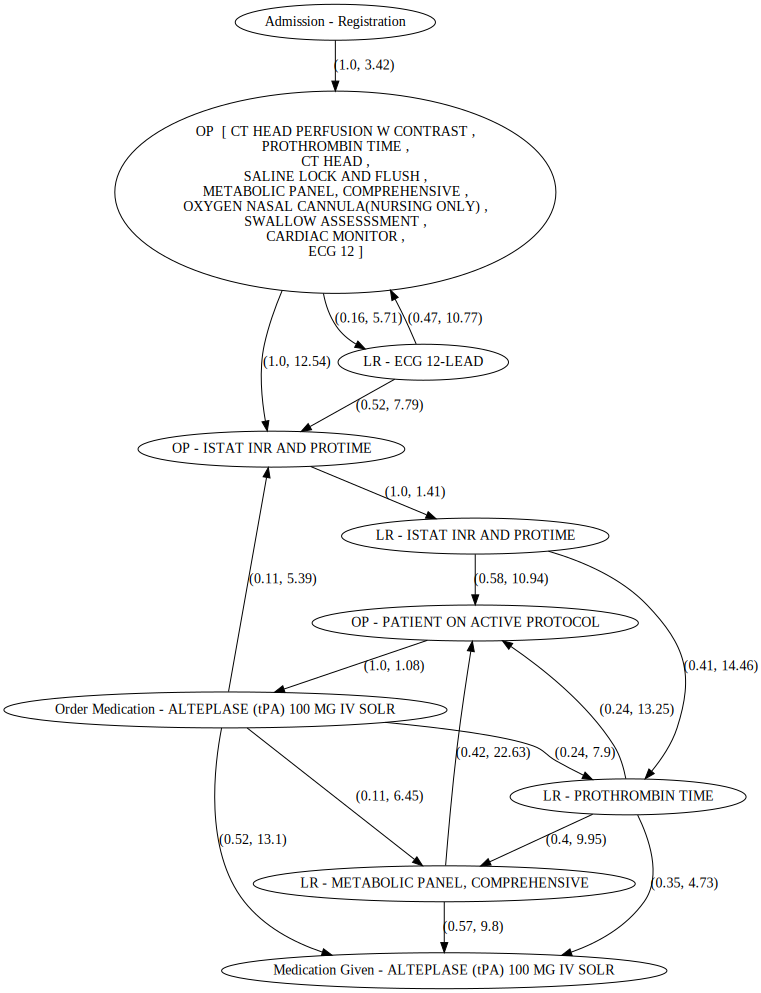

'more_desc.gv.pdf'

In [77]:

#Create Node names for the shrinked components:
W={}
for i in range(np.max(labels)+1):
    I_eq = np.arange(labels.shape[0])[labels==i]
    W[i] = I_inv[I_eq[0]].split("-")[0] #+' : [' #+' : [' + [I_inv[i].split("-")[1] for i in ]
    W[i]= W[i]+ ' ['
    k=0
    for j in I_eq:
        if k >0:
            W[i]= W[i]+ ' ,\n'
        k+=1
        W[i]= W[i]+ I_inv[j].split("-")[1]
    W[i]= W[i]+ ' ]'
    W[i] = W[i].replace("&", "&amp;")
    print('debug: 1')
    
##### Assign hashing from graph nodes to the component labels
C={} # C {dict} contains the event names that can be grouped together (keys are event names)
for i in range(labels.shape[0]):
    C[I_inv[i]]= W[labels[i]] #'Event Group: '+str(labels[i])
    

print(I_org)
print('debug: 2')
###################
###### Create a new graph (list of edges) with shrinked nodes 
A_new = []

for e in A:
    
    #    prob=Adj[I[e[0]],I[e[1]]] # find the probability weight from the adjacency matrix
    #lag=Adj_lag[I[e[0]],I[e[1]]] # find the probability weight from the adjacency matrix
    #label='('+str(int(prob*100)/100)+', '+str(int(lag*100)/100)+')'
    
    # consider the edges from the original graph, if one node is in the connected components, 
    # then create a new edge with the new aggregated nodes
    e0,e1 = e[0],e[1] # nodes of a edge
    e0_org = e0
    e1_org = e1
    
    if e0 in C:
        e0 = C[e0] # new node
    if e1 in C:
        e1 = C[e1] # new node
    
    # add the edge if not a self-loop and not already existing
    if e0 !=e1:
        
        # compute the weights
        prob=Adj[I_org[e0_org],I_org[e1_org]] # find the probability weight from the adjacency matrix
        lag=Adj_lag[I_org[e0_org],I_org[e1_org]] # find the probability weight from the adjacency matrix
        
        # check if the edge is already in the list
        isinlist = False
        for i in range(len(A_new)):
            if A_new[i][0]==e0 and A_new[i][1]==e1:
                isinlist = True
                # add to the edge count
                new_prob = np.min([A_new[i][2]+ prob, 1])#((A_new[i][2] * A_new[i][4])+prob)/ (1 + A_new[i][4])
                new_lag = ((A_new[i][3] * A_new[i][4])+prob)/ (1 + A_new[i][4])
                new_count =1 + A_new[i][4]
                A_new[i] = (e0,e1,new_prob,new_lag,new_count)
                
                
        if isinlist == False:
            count = 1
            A_new.append((e0,e1,prob,lag,count))
        
print('debug: 3')
#################
####### draw the new graph

dot = graphviz.Digraph()

for e in A_new:
    label='('+str(int(e[2]*100)/100)+', '+str(int(e[3]*100)/100)+')'
    dot.edge(e[0],e[1], label=label)
    #dot.edge.attr['weight'] = e[2]
print('debug: 4')
engin = sorted(graphviz.ENGINES)[0]
display(dot)
dot.render('more_desc.gv', view=True) 

# Conformity Results

In [103]:
# for all of the patients
#print(A_new)
#print('\n\n')
import math
#Score = np.zeros(len(unq_PC_enc))

list_of_the_scores = []

for i in range(len(unq_PC_enc)):
    total_cost = 0
    total_edge_count = 0
    
    L = unq_PC_enc.node_name.iloc[i]
    #print('i: ',i)
    # for on all of the nodes of the patient i
    for j in range(len(L)-1):

        #Score[i] +=  - math.log(E[(L[j],L[j+1])]/E_max)
        e0 = L[j]
        e1 = L[j+1]
        # is there any aggregation?
        if e0 in C:
            e0 = C[e0] # new node
        if e1 in C:
            e1 = C[e1] # new node
        
        #print('e0, e1', e0,e1)
        total_edge_count += 1
        
        for e in A_new: #(e0,e1,new_prob,new_lag,new_count)
            if e[0]==e0 and e[1]==e1:
                total_cost += e[2]
                
    
    total_edge_count = max(total_edge_count,1)
    list_of_the_scores.append(total_cost/total_edge_count)
    
                
                

        
        
    
#    Score[i] = Score[i]#/len(L)

print(list_of_the_scores)

#Score = -Score
#med = np.argmin(Score)

#print(np.argmin(Score), Score[med])

#path_med_edges = [(unq_PC_enc.node_name.iloc[med][t],unq_PC_enc.node_name.iloc[med][t+1]) for t in range(len(unq_PC_enc.node_name.iloc[med])-1)]
#print(path_med_edges)

[0.3338418510043224, 0.24855310021045815, 0.23888618962410998, 0.3574716094158105, 0.2517102461248055, 0.294685128242032, 0.3350932189407688, 0.23081721644833528, 0.38126759804091, 0.26099830296744997, 0.5347285199063856, 0.20029599633748346, 0.13729775323978222, 0.39453366940863166, 0.3261010880769944, 0.29754160549095016, 0.19479033552260097, 0.19146463600408875, 0.25748038946360097, 0.2579575596816976, 0.22529644268774704, 0.2833216761660434, 0.486383500166232, 0.16687016687016687, 0.28772390267958464, 0.1695906432748538, 0.3218196518476203, 0.3753907894511039, 0.3050050164290219, 0.5681214054419796, 0.2168543419677721, 0.22768454257972656, 0.2139498432601881, 0.5, 0.3233082706766917, 0.3313416989245764, 0.20686592028497058, 0.30781511180090615, 0.2807017543859649, 0.24291094282777595, 0.4327877898050184, 0.37016093953893, 0.22776291412125477, 0.38404437919034684, 0.27203419821189884, 0.36620505291193867, 0.16095735027223232, 0.2451557706264779, 0.2721264634083996, 0.223563218390804

In [105]:
list_of_the_scores = np.array(list_of_the_scores)
print(np.argmax(list_of_the_scores), np.max(list_of_the_scores))

202 0.6400739653172447


In [106]:

def return_node_list(i):
    edge_list = []
    L = unq_PC_enc.node_name.iloc[i]

    #print('i: ',i)
    # for on all of the nodes of the patient i
    node_list = []
    for j in range(len(L)):

        #Score[i] +=  - math.log(E[(L[j],L[j+1])]/E_max)
        e0 = L[j]
        # e1 = L[j+1]
        # is there any aggregation?
        if e0 in I_org:
            if e0 in C:
                e0 = C[e0] # new node
            node_list.append(e0)

    return node_list

def return_edge_list(i):
    edge_list=[]
    node_list = return_node_list(i)
    
    for j in range(len(node_list)-1):

        #Score[i] +=  - math.log(E[(L[j],L[j+1])]/E_max)
        e0 = node_list[j]
        e1 = node_list[j+1]
        
        edge_list.append((e0,e1))

    return edge_list
    



In [112]:
i= np.argmax(list_of_the_scores)
print(len(list_of_the_scores),i)
max_path = return_edge_list(i)
print(return_edge_list(i))

264 202
[('Admission - Registration', 'OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LOCK AND FLUSH ,\n METABOLIC PANEL, COMPREHENSIVE ,\n OXYGEN NASAL CANNULA(NURSING ONLY) ,\n SWALLOW ASSESSSMENT ,\n CARDIAC MONITOR ,\n ECG 12 ]'), ('OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LOCK AND FLUSH ,\n METABOLIC PANEL, COMPREHENSIVE ,\n OXYGEN NASAL CANNULA(NURSING ONLY) ,\n SWALLOW ASSESSSMENT ,\n CARDIAC MONITOR ,\n ECG 12 ]', 'LR - ECG 12-LEAD'), ('LR - ECG 12-LEAD', 'OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LOCK AND FLUSH ,\n METABOLIC PANEL, COMPREHENSIVE ,\n OXYGEN NASAL CANNULA(NURSING ONLY) ,\n SWALLOW ASSESSSMENT ,\n CARDIAC MONITOR ,\n ECG 12 ]'), ('OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LOCK AND FLUSH ,\n METABOLIC PANEL, COMPREHENSIVE ,\n OXYGEN NASAL CANNULA(NURSING ONLY) ,\n SWALLOW ASSESSSMENT ,\n CARDIAC MONITOR ,\n ECG 12 ]', 'OP 

In [82]:
####### draw the new graph
import networkx as nx
import pygraphviz as pgv # pygraphviz should be available

G = nx.DiGraph()

for e in A_new:
    label='('+str(int(e[2]*100)/100)+', '+str(int(e[3]*100)/100)+')'
    #dot.edge(e[0],e[1], label=label)
    #dot.edge.attr['weight'] = e[2]
    if (e[0],e[1]) in max_path:
        
        G.add_edge(e[0],e[1], label=label, penwidth="3", color="green") #, penwidth=str(3*prob))#, penwidth=1)
    
    else:
        G.add_edge(e[0],e[1], label=label)

new_G = nx.nx_agraph.to_agraph(G)
display(new_G)
new_G.draw('max_path.png', prog='dot')




<AGraph <Swig Object of type 'Agraph_t *' at 0x11f2699f0>>

# Least conformity

In [115]:
list_of_the_scores = np.array(list_of_the_scores)
print(np.argmin(list_of_the_scores), np.min(list_of_the_scores))
i = np.argmin(list_of_the_scores)
print(unq_PC_enc.loc[i,:])

220 0.0
enc_id                                            131182886510
node_name    [OP - CT HEAD PERFUSION W CONTRAST, OP - PROTH...
time_diff    [-1, -1, -1, -1, -1, -1, -1, -1, -1, 7, 8, 8, ...
Name: 220, dtype: object


In [120]:
df[df.enc_id==131182886510]
df[df.enc_id==131182886510].to_csv('least_conformity.csv')


In [110]:
i= np.argmin(list_of_the_scores)
max_path = return_edge_list(i)
print(return_edge_list(i))

[('OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LOCK AND FLUSH ,\n METABOLIC PANEL, COMPREHENSIVE ,\n OXYGEN NASAL CANNULA(NURSING ONLY) ,\n SWALLOW ASSESSSMENT ,\n CARDIAC MONITOR ,\n ECG 12 ]', 'OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LOCK AND FLUSH ,\n METABOLIC PANEL, COMPREHENSIVE ,\n OXYGEN NASAL CANNULA(NURSING ONLY) ,\n SWALLOW ASSESSSMENT ,\n CARDIAC MONITOR ,\n ECG 12 ]'), ('OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LOCK AND FLUSH ,\n METABOLIC PANEL, COMPREHENSIVE ,\n OXYGEN NASAL CANNULA(NURSING ONLY) ,\n SWALLOW ASSESSSMENT ,\n CARDIAC MONITOR ,\n ECG 12 ]', 'OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LOCK AND FLUSH ,\n METABOLIC PANEL, COMPREHENSIVE ,\n OXYGEN NASAL CANNULA(NURSING ONLY) ,\n SWALLOW ASSESSSMENT ,\n CARDIAC MONITOR ,\n ECG 12 ]'), ('OP  [ CT HEAD PERFUSION W CONTRAST ,\n PROTHROMBIN TIME ,\n CT HEAD ,\n SALINE LO

### Test graph plot

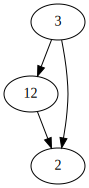

In [17]:
from IPython.display import display

import graphviz

dot = graphviz.Digraph()
dot.edge('12','2')
dot.edge('3','2')
dot.edge('3','12')

engin = sorted(graphviz.ENGINES)[0]
display(dot)
#for engine in sorted(graphviz.ENGINES):
#    print(engine)
#    dot.engine = engine
#    display(dot)
#    print()
    
#dot.render('sample_graph.gv', view=True)    